In [206]:
import numpy as np
import pandas as pd
pd.options.display.max_columns
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from pycaret.regression import setup, compare_models

import optuna

In [205]:
# No requirement of doing Feature Selection as the number of columns we have is very less.

# You can use feature importance using CatBoost

In [103]:
train0 = pd.read_csv("train.csv")
test0 = pd.read_csv("test.csv")

In [104]:
sample_submission = pd.read_csv("sample_submission.csv")

In [105]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [106]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Cleaning

In [107]:
missing_cols_train0 = train0.isna().sum().sort_values().items()

for i,j in missing_cols_train0:
    if j>0:
        print(i,j)

Electrical 1
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtFinType1 37
BsmtFinType2 38
BsmtExposure 38
GarageQual 81
GarageFinish 81
GarageYrBlt 81
GarageType 81
GarageCond 81
LotFrontage 259
FireplaceQu 690
Fence 1179
Alley 1369
MiscFeature 1406
PoolQC 1453


In [108]:
missing_cols_test0 = test0.isna().sum().sort_values().items()

for i,j in missing_cols_test0:
    if j>0:
        print(i,j)

GarageCars 1
GarageArea 1
KitchenQual 1
Exterior1st 1
SaleType 1
TotalBsmtSF 1
BsmtUnfSF 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtFullBath 2
Functional 2
Utilities 2
BsmtHalfBath 2
MSZoning 4
MasVnrArea 15
MasVnrType 16
BsmtFinType2 42
BsmtFinType1 42
BsmtExposure 44
BsmtQual 44
BsmtCond 45
GarageType 76
GarageFinish 78
GarageYrBlt 78
GarageQual 78
GarageCond 78
LotFrontage 227
FireplaceQu 730
Fence 1169
Alley 1352
MiscFeature 1408
PoolQC 1456


In [109]:
for i,j in missing_cols_test0:
    if i not in missing_cols_train0:
        print(i)

In [110]:
for i,j in missing_cols_train0:
    if i not in missing_cols_test0:
        print(i)

#### Combining train and test datasets

In [111]:
target = train0['SalePrice']
test_ids = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis=1)
test1 = test0.drop('Id', axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)

data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Cleaning

In [112]:
## Ensure proper data types

data2 = data1.copy()

In [113]:
# Read the column name to identify which column has categorical data

data2['MSSubClass'] = data2['MSSubClass'].astype(str)

In [114]:
data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


## Fill Categorical Missing Values

In [115]:
# For this you have to go through the data set description and read that out if the NA value actually means something.

# Like, when I went through the description of Alley, I found out that NA means No alley access so, it is a data you cannot replace it.

In [116]:
# Columns with object datatype with missing values:

data2.select_dtypes('object').loc[:, data2.isna().sum()>0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [117]:
# Impute using the column mode
# For those who do not have a meaning for 'NA'
for column in [ 
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType1',
    'BsmtFinType2',
    'GarageCond',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna("None")


# Impute using a constant value
# For those who actually have a meaning for 'NA'
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [118]:
for i,j in data2.select_dtypes('object').isna().sum().sort_values().items():
    if j>0:
        print(i, j)

In [119]:
data3 = data2.copy()

In [120]:
for i,j in data2.select_dtypes(np.number).isna().sum().sort_values().items():
    if j>0:
        print(i, j)

GarageCars 1
TotalBsmtSF 1
BsmtUnfSF 1
BsmtFinSF2 1
GarageArea 1
BsmtFinSF1 1
BsmtFullBath 2
BsmtHalfBath 2
MasVnrArea 23
GarageYrBlt 159
LotFrontage 486


In [121]:
# For Handling Numeric Missing Values, the best way to do it by using KNN Imputation

data3 = data2.copy()

In [122]:
data3.select_dtypes(np.number).isna().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [123]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    x_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    x_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [124]:
knn_impute(data3, 'LotFrontage').isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

In [125]:
data3.columns[data3.isna().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [126]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data3 = knn_impute(data3, column)

In [127]:
data3.columns[data3.isna().sum() > 0]

Index([], dtype='object')

In [128]:
data4 = data3.copy()

### Feature Engineering

In [129]:
# It's better to look at what others have done in Feature Engineering

In [130]:
data4["SqFtPerRoom"] = data4["GrLivArea"]/(data4["TotRmsAbvGrd"] + data4["FullBath"] + data4["HalfBath"] + data5["KitchenAbvGr"])

data5["Total_Home_Quality"] = data5["OverallQual"] + data4["OverallCond"]

data4["Total_Bathrooms"] = (data4["FullBath"] + (0.5*data4["HalfBath"]) + data4["BsmtFullBath"] + (0.5 * data4["BsmtHalfBath"]))

data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [131]:
data4

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Bathrooms,HighQualSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,2,2008,WD,Normal,146.239500,3.5,1710
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0,5,2007,WD,Normal,145.171820,2.5,1262
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0,9,2008,WD,Normal,184.253882,3.5,1786
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0,2,2006,WD,Abnorml,197.511898,2.0,1717
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0,12,2008,WD,Normal,173.164304,3.5,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,6,2006,WD,Normal,141.944509,1.5,1092
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,4,2006,WD,Abnorml,125.616187,1.5,1092
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,9,2006,WD,Abnorml,140.800561,2.0,1224
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,MnPrv,Shed,700,7,2006,WD,Normal,126.086240,1.5,970


In [132]:
data5 = data4.copy

### Feature Transformations

In [133]:
# It's better to have data normalized, because certain models work better in that

# skew for numeric features

In [134]:
data4.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SqFtPerRoom,Total_Bathrooms,HighQualSF
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,2,2008,146.239500,3.5,1710
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,5,2007,145.171820,2.5,1262
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,9,2008,184.253882,3.5,1786
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,272,0,0,0,0,2,2006,197.511898,2.0,1717
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,12,2008,173.164304,3.5,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,6,2006,141.944509,1.5,1092
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,4,2006,125.616187,1.5,1092
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,0,0,9,2006,140.800561,2.0,1224
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,700,7,2006,126.086240,1.5,970


In [135]:
scipy.stats.skew(data4['LotFrontage'])

# positive value means it is right skewed while a negative value means it is left skewed

1.3407511399227516

In [136]:
skew_df = data4.select_dtypes(np.number)

In [137]:
# Skew for each numeric value

scipy.stats.skew(skew_df)

array([ 1.34075114, 12.8224314 ,  0.19711045,  0.57031205, -0.59980555,
       -0.45102038,  2.60368152,  1.42551624,  4.14611071,  0.91932181,
        1.16280584,  1.46960442,  0.86167475, 12.088761  ,  1.26935769,
        0.62437257,  3.93159384,  0.16760573,  0.69456649,  0.32632435,
        4.30225437,  0.75836691,  0.7334946 , -0.34632694, -0.21859252,
        0.24089573,  1.84243281,  2.53511373,  4.00389122, 11.37606468,
        3.9466937 , 16.89832792, 21.94719481,  0.19588394,  0.13239881,
        0.9212458 ,  0.49340224,  1.25203567])

In [138]:
skew_df =pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [139]:
data4[skew_df.query("skewed == True")['Feature'].values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SqFtPerRoom,HighQualSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,70.154916,10168.114080,5.564577,1971.312778,102.189654,441.332580,49.576841,560.797670,1051.679822,1159.581706,...,0.597122,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,162.954492,1496.065433
std,22.697641,7886.996359,1.113131,30.291442,178.934095,455.559081,169.176867,439.470508,440.722380,392.362079,...,0.646129,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,28.382825,503.675790
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.722190,334.000000
25%,60.000000,7478.000000,5.000000,1953.500000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.871157,1120.000000
50%,70.000000,9453.000000,5.000000,1973.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,...,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.113116,1440.000000
75%,80.100000,11570.000000,6.000000,2001.000000,164.000000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,178.600509,1742.500000
max,313.000000,215245.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,359.519983,5642.000000


In [140]:
# As we can see that we have zero in our data, so we cannot directly use the logarithmic function here
# so we will be using log(x+1) which log1p

In [141]:
np.log1p(0)

0.0

In [142]:
for column in skew_df.query("skewed==True")["Feature"].values:
    data4[column] = np.log1p(data4[column])

In [143]:
skew_df =pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


In [144]:
data4['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [145]:
# what we are seeing in MoSold is that, the data is cyclic like the months 1 and 12 are very closely linked to each other while the 6 the middle month is the most farthest

# Meaningfully, the extreme values are linked while the middle value is the most extreme

# thus we are gonna use the cosine function here

In [146]:
# So go to desmos, find the function -cosin(cx) where the extreme value touches the x-axis at 12.

In [147]:
# Function we got : -cos(0.5236x)

In [148]:
data4['MoSold'] = -np.cos(0.5236 * data4['MoSold'])

In [149]:
data4['MoSold']

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
2914    1.000000
2915    0.500004
2916   -0.000011
2917    0.866021
2918   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [150]:
data5 = data4.copy()

### Encode Categoricals

In [151]:
data5 = pd.get_dummies(data5)

In [152]:
data6 = data5.copy()

### Scaling

In [153]:
scaler = StandardScaler()
scaler.fit(data6)

data6 = pd.DataFrame(scaler.transform(data6), index=data6.index, columns = data6.columns)

In [154]:
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


### Target Transformation

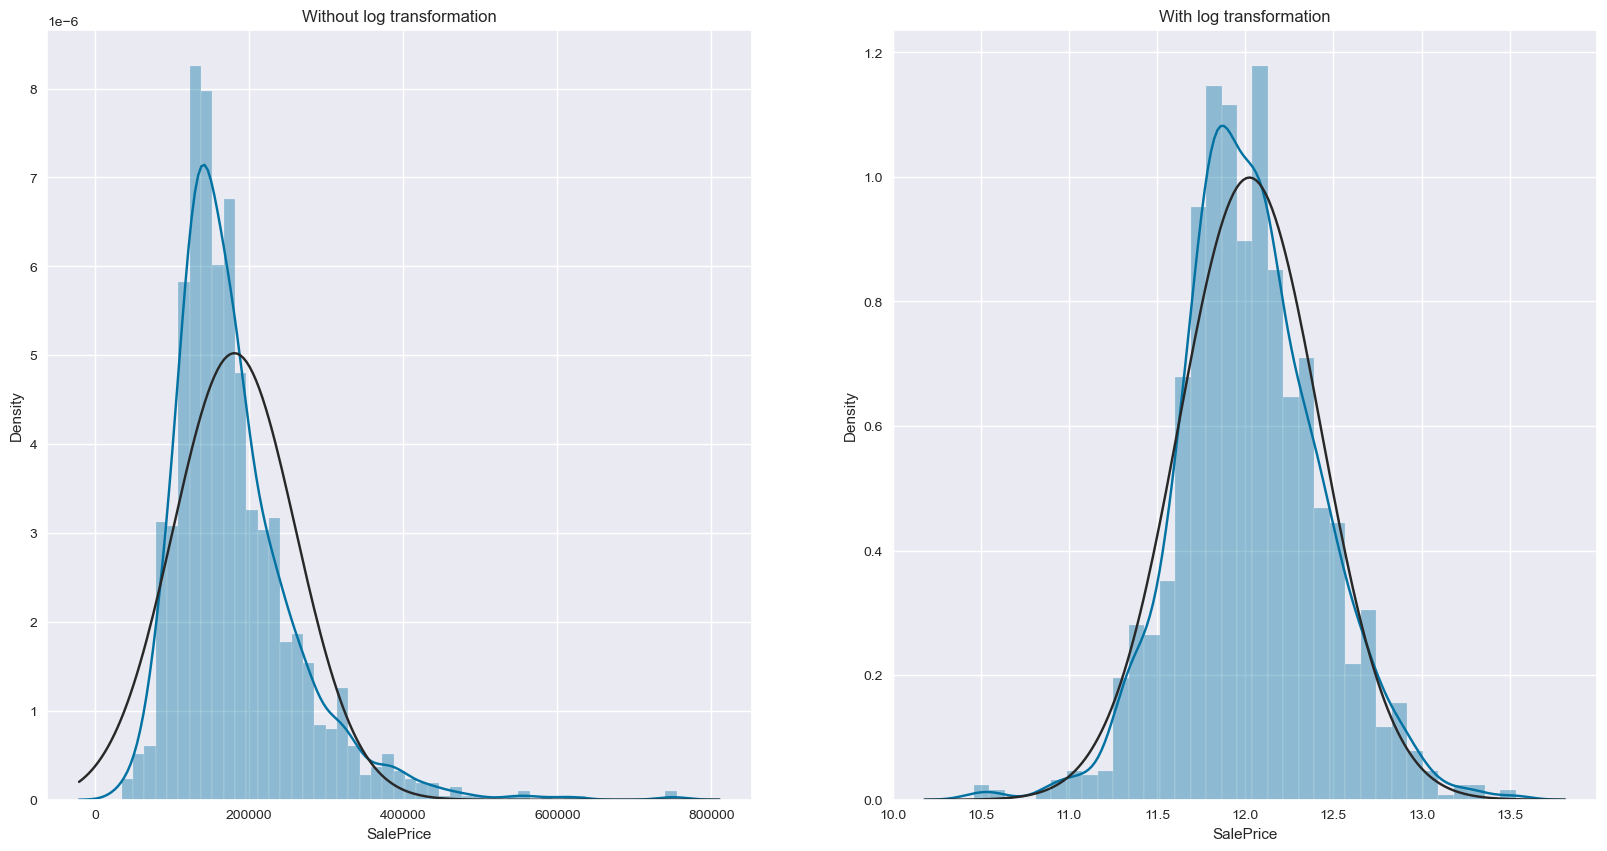

In [155]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without log transformation")

plt.subplot(1,2,2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title("With log transformation")

plt.show()

In [156]:
log_target = np.log(target)

In [157]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [158]:
data7 = data6.copy()

### Split Data

In [159]:
train0.index.max()

1459

In [160]:
test0.index.max()

1458

In [161]:
data7.index.max()

2918

In [162]:
train_final = data7.loc[:train0.index.max(), :].copy()
test_final = data7.loc[train0.index.max()+1:, :].reset_index(drop=True).copy()

print(len(train_final), len(test_final))

1460 1459


In [163]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


## Model Selection

In [164]:
# PyCaret: automatically runs the models for us, and automatically does the K-fold for us

In [165]:
_ = setup(data=pd.concat([train_final, log_target], axis=1), target = 'SalePrice')

,Description,Value
0,Session id,8850
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 321)"
4,Transformed data shape,"(1460, 321)"
5,Transformed train set shape,"(1021, 321)"
6,Transformed test set shape,"(439, 321)"
7,Numeric features,320
8,Preprocess,True
9,Imputation type,simple


In [166]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0816,0.0155,0.1236,0.8987,0.0096,0.0068,6.7770
omp,Orthogonal Matching Pursuit,0.0879,0.0172,0.1295,0.8871,0.0100,0.0074,0.0480
br,Bayesian Ridge,0.0856,0.0174,0.1295,0.8853,0.0100,0.0072,0.0430
gbr,Gradient Boosting Regressor,0.0916,0.0186,0.1353,0.8779,0.0104,0.0077,0.7150
lightgbm,Light Gradient Boosting Machine,0.0944,0.0197,0.1399,0.8713,0.0109,0.0079,0.4910
ridge,Ridge Regression,0.0903,0.0197,0.1372,0.8692,0.0106,0.0076,0.0230
et,Extra Trees Regressor,0.1018,0.0224,0.1491,0.8552,0.0116,0.0085,0.9340
rf,Random Forest Regressor,0.1008,0.0224,0.1491,0.8543,0.0116,0.0084,0.7470
ada,AdaBoost Regressor,0.1291,0.0304,0.1739,0.8029,0.0134,0.0108,0.3990
knn,K Neighbors Regressor,0.1385,0.0382,0.1949,0.7555,0.0151,0.0116,0.0610


In [167]:
# Loss function of Binary Classification: f(x) = -(yi ln(x) + (1-yi) ln(1-x) )
# yi = 0, yi = 1

In [168]:
# mean square error is basically just a parabola

In [169]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge, OrthogonalMatchingPursuit, Ridge
from catboost import CatBoostRegressor


### Baseline Model

In [170]:
reg = GradientBoostingRegressor(random_state=0)


In [171]:
reg.fit(train_final, log_target)

GradientBoostingRegressor(random_state=0)

### Evaluate

In [172]:
kf = KFold(n_splits=10)

results = cross_val_score(reg, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)

In [173]:
np.exp(np.sqrt((np.mean(-results))))

1.1337249587698308

### Make Submission

In [174]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [175]:
predictions = np.exp(reg.predict(test_final))

In [176]:
submission = pd.concat([test_ids, pd.Series(predictions, name='SalePrice')], axis=1)

In [177]:
submission.to_csv('submission1.csv', index=False, header=True)

In [178]:
# Till here we got a score of 0.13441 that gave us a rank of 1338

In [179]:
# Using Ensembling will help us do better

## Bagging Ensemble

In [180]:
models = {
    "GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
    "LightGradientBoosting":LGBMRegressor(),
    "BayesianRidge":BayesianRidge(),
    "OrthogonalMatchingPursuit":OrthogonalMatchingPursuit(),
    "RandomForestRegressor": RandomForestRegressor(max_depth=2, random_state=0),
    "CatBoostRegressor": CatBoostRegressor(iterations=2, learning_rate=1, depth=2)
}

In [181]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

GradientBoostingRegressor trained.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4266
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 215
[LightGBM] [Info] Start training from score 12.024051
LightGradientBoosting trained.
BayesianRidge trained.
OrthogonalMatchingPursuit trained.
RandomForestRegressor trained.
0:	learn: 0.2927074	total: 2.75ms	remaining: 2.75ms
1:	learn: 0.2548100	total: 7.6ms	remaining: 0us
CatBoostRegressor trained.


In [182]:
results = {}

kf = KFold(n_splits=10)
for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4152
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 210
[LightGBM] [Info] Start training from score 12.026856
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4131
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 209
[LightGBM] [Info] Start training from score 12.018892
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [183]:
results

{'GradientBoostingRegressor': array([1.13516498, 1.10782927, 1.11800482, 1.17535003, 1.17352683,
        1.10368193, 1.12607366, 1.11310626, 1.11856892, 1.1475713 ]),
 'LightGradientBoosting': array([1.140469  , 1.11082656, 1.12854202, 1.17148998, 1.17174154,
        1.11528694, 1.14230363, 1.11665876, 1.13262122, 1.15027199]),
 'BayesianRidge': array([1.12581474, 1.10621844, 1.1257267 , 1.16792768, 1.15336072,
        1.14254548, 1.12754762, 1.10281353, 1.19721759, 1.13478241]),
 'OrthogonalMatchingPursuit': array([1.13181799, 1.09725882, 1.12930056, 1.18100346, 1.15554128,
        1.15934345, 1.12467452, 1.11595193, 1.17872568, 1.15533065]),
 'RandomForestRegressor': array([1.2652404 , 1.23869406, 1.25561733, 1.2843156 , 1.30435377,
        1.22659289, 1.25554207, 1.24410091, 1.25236666, 1.27096192]),
 'CatBoostRegressor': array([1.29046439, 1.26535771, 1.27638526, 1.32029502, 1.32685424,
        1.27325388, 1.27987092, 1.28303237, 1.30820177, 1.296008  ])}

In [184]:
for name, result in results.items():
    print("\n---------"+name+"-------------")
    print(np.mean(result))
    print(np.std(result))


---------GradientBoostingRegressor-------------
1.1318878001682349
0.02451642382774154

---------LightGradientBoosting-------------
1.1380211631148696
0.020647995839313885

---------BayesianRidge-------------
1.1383954906103495
0.027063467978055374

---------OrthogonalMatchingPursuit-------------
1.1428948334803102
0.026017882935355528

---------RandomForestRegressor-------------
1.2597785608932321
0.0215075529099159

---------CatBoostRegressor-------------
1.2919723565763874
0.019567626846048243


### Combine Predictions

In [201]:
final_predictions = (
    0.50*np.exp(models['GradientBoostingRegressor'].predict(test_final)) +
    0.30*np.exp(models['LightGradientBoosting'].predict(test_final)) +
    0.20*np.exp(models['BayesianRidge'].predict(test_final))
    # 0.20*np.exp(models['RandomForestRegressor'].predict(test_final))+
    # 0.20*np.exp(models['CatBoostRegressor'].predict(test_final))
)

# final_predictions = (
#     np.exp(models['GradientBoostingRegressor'].predict(test_final))
# )
final_predictions


array([122621.88123082, 157528.91323384, 182283.61120201, ...,
       158040.57457553, 118642.50937555, 228414.35104597])

In [202]:
submission = pd.concat([test_ids, pd.Series(final_predictions, name='SalePrice')], axis=1)

In [203]:
submission.to_csv('submission1.csv', index=False, header=True)

In [188]:
# Here, we achieve a score of 0.12831 and a rank of 856

In [189]:
# Feeling so glad